In [10]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)
pd.set_option('display.max_columns', None)

import numpy as np

from google.colab import drive
import os

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, cross_validate, train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import lightgbm 

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve




In [2]:
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Mounted at /content/drive


## Ejercicio 1

In [3]:
orders = pd.read_csv("{}/finalOrders.txt".format(contentFolder), sep=";")

## Ejercicio 2

In [4]:
X = orders.drop(columns = ["orderID", "orderDate", "target"])
y = orders.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

## Ejercicio 3

In [8]:
kf=StratifiedKFold(n_splits=5, random_state = 30, shuffle = True)

lgbModel = lightgbm.LGBMClassifier()

lgbModelCV=cross_validate(lgbModel,X_train,y_train,cv=kf, return_estimator = True, scoring = "roc_auc")


In [9]:
#Calculo el AUC
lgbModelCV["test_score"].mean()

0.8117452407913799

## Ejercicio 4

Se recomienda usar folds estratificados ya que la base se encuentra muy desbalanceada

## Ejercicio 5

In [12]:
#Defino los hiperparametros
hyperparameters = {
              "max_depth":[5, 10, 15, 20],
              "learning_rate": [0.1, 0.01, 0.001],
              "n_estimators": [100, 200, 500, 1000],
              "random_state":[30]
              }
learner = lightgbm.LGBMClassifier()

clf = RandomizedSearchCV(learner, hyperparameters, scoring='roc_auc', cv=4, n_iter=15).fit(X_train,y_train)

In [16]:
clf.best_score_

0.8120416222147159

In [17]:
clf.best_params_

{'random_state': 30, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

In [18]:
clf.best_estimator_

LGBMClassifier(max_depth=5, n_estimators=200, random_state=30)

## Ejercicio 6
Los mejores parámetros son: {'random_state': 30, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}

## Ejercicio 7
El mejor AUC obtenido es 0.812 

## Ejercicio 8


In [19]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.2 MB/s 


In [20]:
from skopt import BayesSearchCV
#Defino los hiperparametros
hyperparameters = {
              "max_depth":[5, 10, 15, 20],
              "learning_rate": [0.1, 0.01, 0.001],
              "n_estimators": [100, 200, 500, 1000],
              "random_state":[30]
              }
learner = lightgbm.LGBMClassifier()
opt = BayesSearchCV(learner,hyperparameters,n_iter=15,cv=5, scoring="roc_auc").fit(X_train, y_train)

In [23]:
opt.best_params_

OrderedDict([('learning_rate', 0.1),
             ('max_depth', 5),
             ('n_estimators', 500),
             ('random_state', 30)])

Los mejores hiperparámetros son:
OrderedDict([('learning_rate', 0.1),
             ('max_depth', 5),
             ('n_estimators', 500),
             ('random_state', 30)])

In [21]:
opt.best_score_

0.8122595629753269

## Ejercicio 9 
El mejor AUC es el 0.8122


## Ejercicio 10 Se realizaron 64 corridas

In [28]:
hyperparameters = {
              "max_depth":[5, 10, 15, 20],
              "learning_rate": [0.1, 0.01, 0.001],
              "n_estimators": [100, 200, 500, 1000],
              "random_state":[30]
              }
learner = lightgbm.LGBMClassifier()
clf = GridSearchCV(learner, hyperparameters, scoring='roc_auc', cv=5).fit(X_train,y_train)


In [29]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'random_state': 30}

## Ejercicio 11 
Los hiperparámetros son: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'random_state': 30}. Los mismos que fueron obtenidos en el punto 8

In [30]:
clf.best_score_

0.8122595629753269

## Ejercicio 12
El AUC obtenido es de 0.8122

## Ejercicio 13

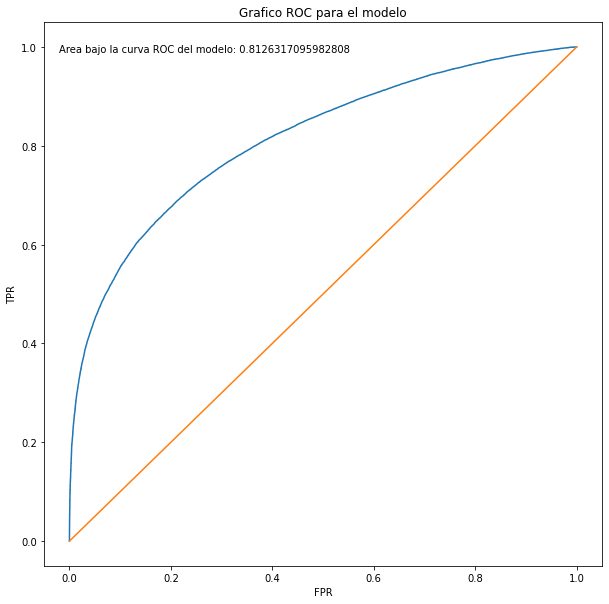

In [31]:
probabilities = clf.predict_proba(X_test)[:,-1]

#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
areaBajoCurvaRoc = roc_auc_score(y_test, probabilities)
fpr, tpr, _ = roc_curve(y_test, probabilities)
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el modelo")
plt.plot(fpr, tpr)
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate('Area bajo la curva ROC del modelo: {}'.format(areaBajoCurvaRoc), (-0.02,0.99))
plt.show()